# Electricity Prediction using RandomForestRegressor

In [1]:
# Data reading
import pandas as pd
import numpy as np
data = pd.read_csv(r'C:\Users\Admin\Downloads\electricity.csv')
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21224\3313763075.py:4: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\Admin\Downloads\electricity.csv')


,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


## Data Exploration

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [3]:
data.isnull().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        0
SystemLoadEA                  0
SMPEA                         0
ORKTemperature                0
ORKWindspeed                  0
CO2Intensity                  0
ActualWindProduction          0
SystemLoadEP2                 0
SMPEP2                        0
dtype: int64

In [4]:
# fill the missing values
data['Holiday'].fillna(data['Holiday'].mode()[0],inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encoder = LabelEncoder()
data['DateTime']=label_encoder.fit_transform(data['DateTime'])

In [7]:
data['Holiday']=label_encoder.fit_transform(data['Holiday'])

In [8]:
from sklearn.preprocessing import LabelEncoder

# Convert all values in 'ForecastWindProduction' column to strings
data['ForecastWindProduction'] = data['ForecastWindProduction'].astype(str)

# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()
data['ForecastWindProduction'] = label_encoder.fit_transform(data['ForecastWindProduction'])


In [9]:
data['SystemLoadEA'] = data['SystemLoadEA'].astype(str)
data['SystemLoadEA']=label_encoder.fit_transform(data['SystemLoadEA'])

In [10]:
data['SMPEA'] = data['SMPEA'].astype(str)
data['SMPEA']=label_encoder.fit_transform(data['SMPEA'])

In [11]:
data['ORKTemperature']=label_encoder.fit_transform(data['ORKTemperature'])

In [12]:
data['ORKWindspeed']=label_encoder.fit_transform(data['ORKWindspeed'])

In [13]:
data['CO2Intensity'] = data['CO2Intensity'].astype(str)
data['CO2Intensity']=label_encoder.fit_transform(data['CO2Intensity'])

In [14]:
data['ActualWindProduction'] = data['ActualWindProduction'].astype(str)
data['ActualWindProduction']=label_encoder.fit_transform(data['ActualWindProduction'])

In [15]:
data['SystemLoadEP2'] = data['SystemLoadEP2'].astype(str)
data['SystemLoadEP2']=label_encoder.fit_transform(data['SystemLoadEP2'])

In [16]:
data['SMPEP2'] = data['SMPEP2'].astype(str)
data['SMPEP2']=label_encoder.fit_transform(data['SMPEP2'])

## To find Correlation

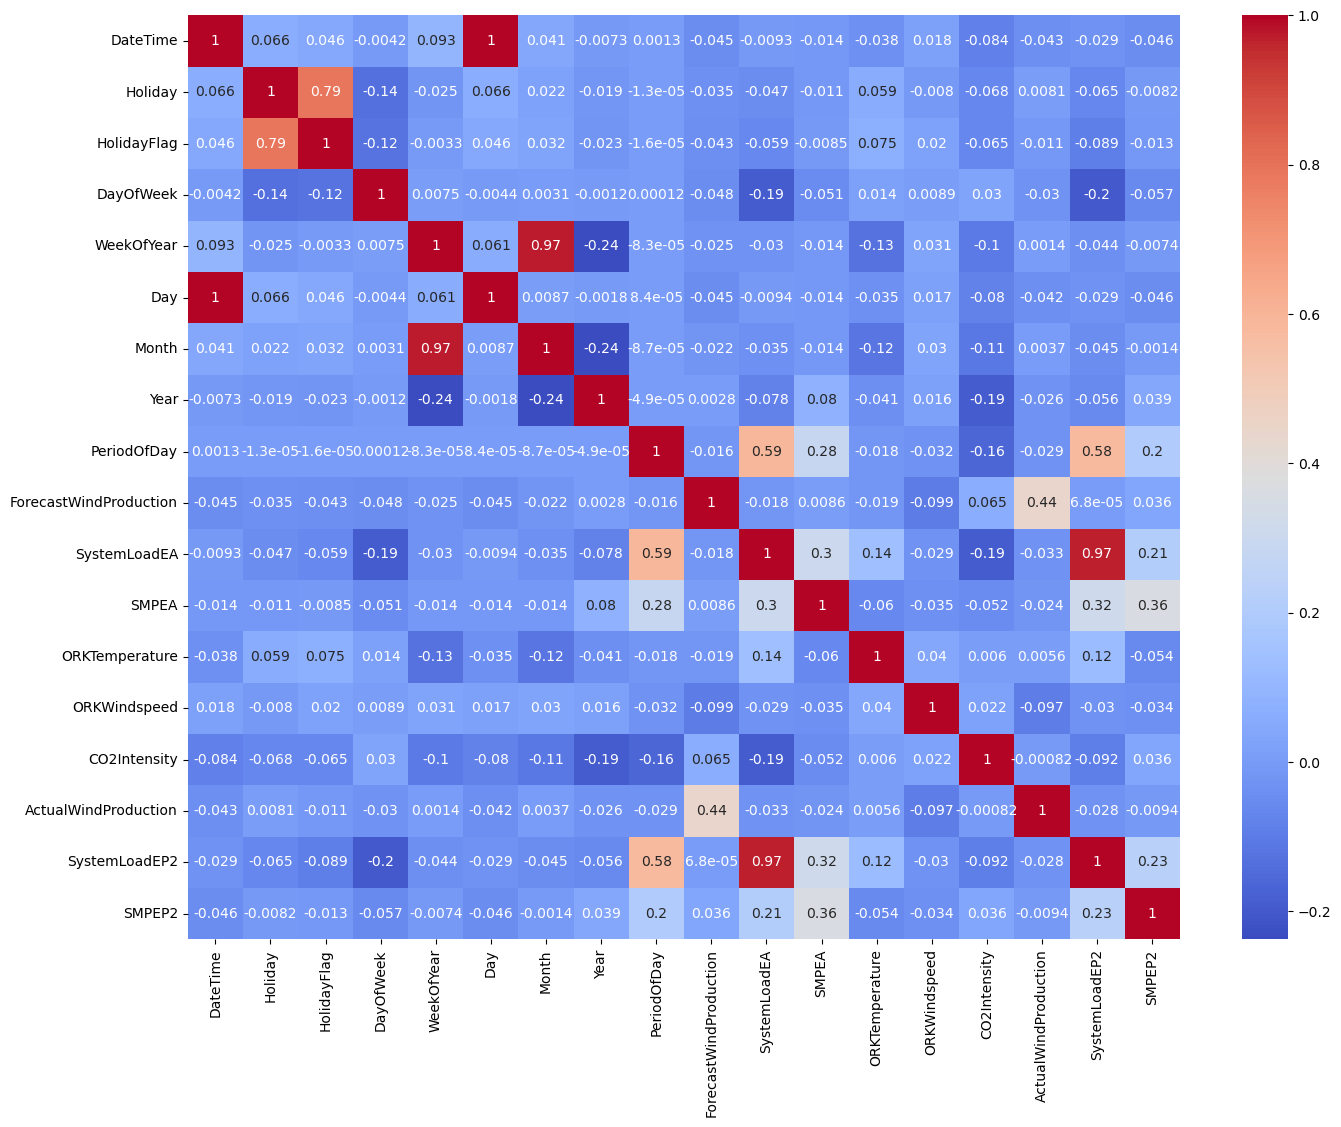

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
correlations = data.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

## Electricity Price Prediction Model

In [18]:
# Train_Test Splitting
x = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2"]]
y = data["SMPEP2"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [19]:
# Model Selection
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [20]:
# Prediction
ypred = model.predict(xtest)
df = pd.DataFrame({'Actual':ytest , 'Predicted':ypred})
df

,Actual,Predicted
35833,5109,5181.67
198,3752,3795.32
36547,4911,4249.22
26373,3728,3664.80
21156,5050,4190.86
...,...,...
13927,3708,3706.98
16926,5883,5742.27
24520,471,1725.02
9059,7420,3855.77


In [21]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 751.6656293568327
Mean Squared Error: 1432574.654136209
Root Mean Squared Error: 1196.9021071650802
R-squared: 0.5614772908563785
